# Initial Data Reports

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import matplotlib.dates as mdates

pd.options.mode.copy_on_write = True

In [166]:
def date_mmddyyyy(date_str, sep='/'):
    month, day, year = date_str.split(sep)
    return date(int(year), int(month), int(day))

def date_yyyymmdd(date_str, sep='-'):
    year, month, day = date_str.split(sep)
    return date(int(year), int(month), int(day))

In [5]:
bloods = pd.read_csv('data/mel/bloodwork_clean.csv').drop(columns='Unnamed: 0')
weight = pd.read_csv('data/mel/weight_clean.csv').drop(columns='Unnamed: 0')

In [6]:
bloods.head()

,date,total_protein,albumin,globulin,ag_ratio,alt,ast,alk,bun,creatinine,...,monocytes,eosinophils,basophils,abs_neutrophils,abs_lymph,abs_mono,abs_eosin,abs_baso,t4,comments
0,2024-07-17,7.1,3.8,3.3,1.2,74,NaN,47,25,1.8,...,2.0,6.0,1.0,4200.0,3444.0,168.0,504.0,84.0,2.0,NaN
1,2025-06-22,NaN,NaN,NaN,NaN,87,43.0,52,22,1.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-05-13,7.0,3.6,3.4,1.1,54,NaN,43,24,1.7,...,1.0,5.0,0.0,6930.0,4914.0,126.0,630.0,0.0,3.1,NaN


In [ ]:
bloods['date'] = bloods['date'].apply(lambda row: date_yyyymmdd(row))

In [177]:
weight['date'] = weight['date'].apply(lambda row: date_yyyymmdd(row))

In [179]:
weight

,date,weight (lbs),location,notes
0,2025-05-12,7.50,yarmouth,"good weight, stay below 8 lbs"
1,2025-06-22,7.72,wecare,NaN
2,2025-06-30,7.94,three_notch,NaN
3,2025-07-14,7.79,home,NaN
4,2025-07-16,7.74,home,NaN
5,2025-07-18,7.68,home,NaN


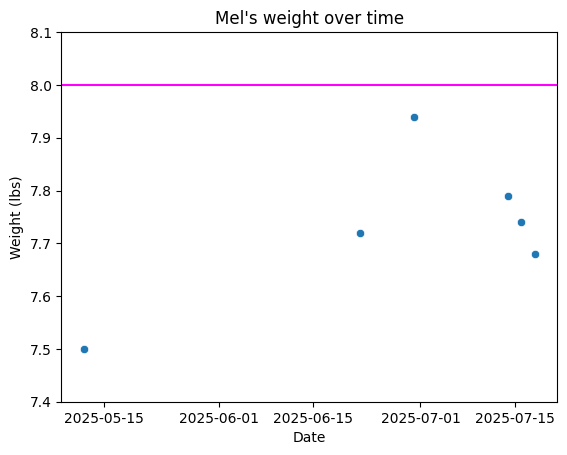

In [180]:
fig, ax = plt.subplots()

sns.scatterplot(data=weight, x='date', y='weight (lbs)')

ax.set_xlabel('Date')
ax.set_ylabel('Weight (lbs)')
ax.set_title("Mel's weight over time")
ax.axhline(8, xmin=0, xmax=1, c='magenta')
ax.set_ylim(7.4, 8.1);

In [34]:
bloods.columns

Index(['date', 'total_protein', 'albumin', 'globulin', 'ag_ratio', 'alt',
       'ast', 'alk', 'bun', 'creatinine', 'soma', 'bun_creat_ratio', 'glucose',
       'sodium', 'potassium', 'na_k_ratio', 'chloride', 'wbc', 'rbc',
       'hemoglobin', 'hct ', 'mcv ', 'mch', 'mchc', 'blood_parasites',
       'rbc_morph', 'platelet_count', 'platelet_est', 'neutrophils', 'bands',
       'lymphocytes', 'monocytes', 'eosinophils', 'basophils',
       'abs_neutrophils', 'abs_lymph', 'abs_mono', 'abs_eosin', 'abs_baso',
       't4', 'comments'],
      dtype='object')

In [35]:
bloods.isnull().sum()

date               0
total_protein      1
albumin            1
globulin           1
ag_ratio           1
alt                0
ast                2
alk                0
bun                0
creatinine         0
soma               1
bun_creat_ratio    0
glucose            1
sodium             1
potassium          1
na_k_ratio         1
chloride           1
wbc                1
rbc                1
hemoglobin         1
hct                1
mcv                1
mch                1
mchc               1
blood_parasites    2
rbc_morph          2
platelet_count     1
platelet_est       1
neutrophils        1
bands              2
lymphocytes        1
monocytes          1
eosinophils        1
basophils          1
abs_neutrophils    1
abs_lymph          1
abs_mono           1
abs_eosin          1
abs_baso           1
t4                 1
comments           3
dtype: int64

In [182]:
data_g = bloods[['date', 'glucose']]

data_g['extrema'] = data_g['glucose'].apply(lambda x: high_or_low(x, 64, 170))

data_g

,date,glucose,extrema
0,2024-07-17,118.0,0
1,2025-06-22,NaN,0
2,2025-05-13,253.0,1


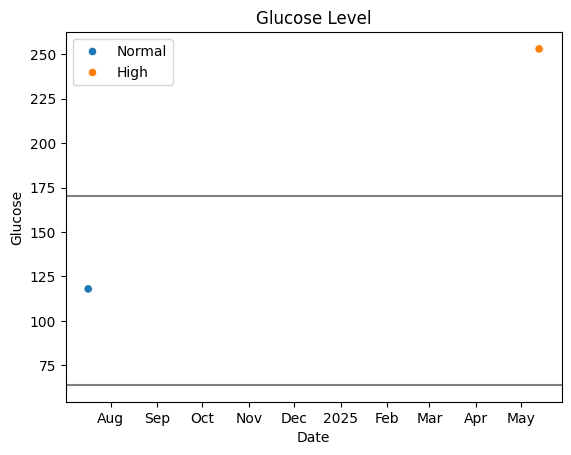

In [187]:
fig, ax = plt.subplots()

sns.scatterplot(data=data_g, x='date', y='glucose', hue='extrema')

ax.set_xlabel('Date')
ax.set_ylabel('Glucose')
ax.set_title("Glucose Level");
ax.axhline(170, xmin=0, xmax=1, c='gray')
ax.axhline(64, xmin=0, xmax=1, c='gray');

leg_map = {'0': 'Normal', '1': 'High', '-1': 'Low'}
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [leg_map[l] for l in labels])

ax.xaxis.set_major_formatter(
    mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()));


In [211]:
blood_dict = pd.read_csv('data/bloodwork_dict.csv').set_index('test')

In [212]:
blood_dict

,full_name,dtype,min,max,units,comments
test,,,,,,
total_protein,total protein,float,5.20,8.80,g/dL,NaN
albumin,albumin,float,2.50,3.90,NaN,NaN
globulin,globulin,float,2.30,5.30,NaN,NaN
ag_ratio,albumin / globulin ratio,float,0.35,1.50,NaN,albumin / globulin ratio
alt,alanine aminotransferase,float,10.00,100.00,IU/L,NaN
ast,aspartate aminotransferase,float,0.00,48.00,IU/L\t,NaN
alk,alkaline phosphatase,float,6.00,102.00,IU/L,ALP
bun,blood urea nitrogen,float,14.00,36.00,IU/L,NaN
creatinine,creatinine,float,0.60,2.40,mg/dL,NaN


In [55]:
blood_dict.loc[cat]

full name    BUN / Creatinine ratio
dtype                         float
min                             4.0
max                            33.0
units                           NaN
comments                        NaN
Name: bun_creat_ratio, dtype: object

In [117]:
def high_or_low(value, min_value, max_value):
    if value > max_value:
        return 1
    elif value < min_value:
        return -1
    else:
        return 0

In [208]:
def test_eda(cat, savefig=False):
    cat_min = blood_dict.loc[cat, 'min']
    cat_max = blood_dict.loc[cat, 'max']
    cat_name = blood_dict.loc[cat, 'full_name']
    cat_type = blood_dict.loc[cat, 'dtype']

    data = bloods[['date', cat]]
    
    if cat_type in [float, 'float']:
        data['extrema'] = data[cat].apply(lambda x: high_or_low(x, cat_min, cat_max))
        
        fig, ax = plt.subplots()

        if (data[cat].max() > cat_max > 0) or (data[cat].min() < cat_min and cat_min >= 0):
            sns.scatterplot(data=data, x='date', y=cat, hue='extrema')

            ax.axhline(cat_min, xmin=0, xmax=1, c='gray')
            ax.axhline(cat_max, xmin=0, xmax=1, c='gray')
            
            h, l = ax.get_legend_handles_labels()
            ax.legend(h, l)
            
            leg_map = {'0': 'Normal', '1': 'High', '-1': 'Low'}
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(handles, [leg_map[l] for l in labels])

        else:
            sns.scatterplot(data=data, x='date', y=cat)
            if cat_max > 0:
                ax.axhline(cat_min, xmin=0, xmax=1, c='gray')
            if cat_min >= 0:
                ax.axhline(cat_max, xmin=0, xmax=1, c='gray')
        
        ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()));
        ax.set_xlabel('Date')
        ax.set_ylabel(cat_name)
        ax.set_title(f"Mel's {cat_name}");

        if savefig==True:
            plt.savefig(f"images/{cat}.jpg")
        
        plt.show(fig)
        plt.close(fig)

        return None

    elif cat_type == str:
        pass

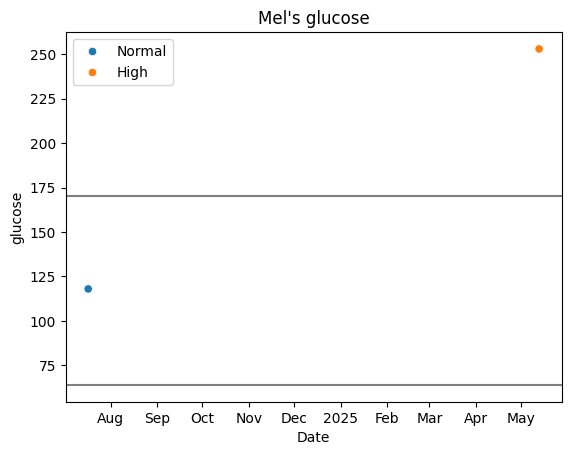

In [209]:
test_eda('glucose')

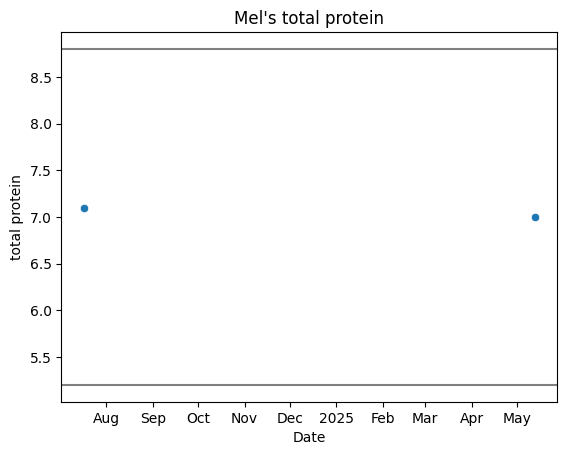

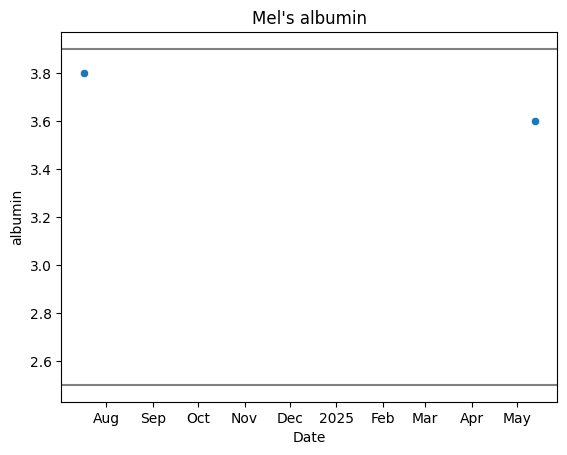

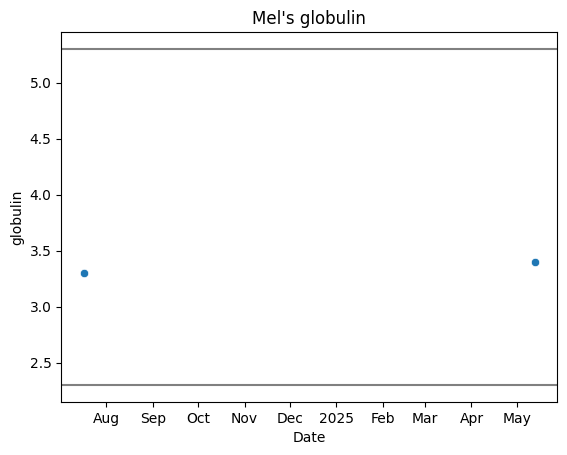

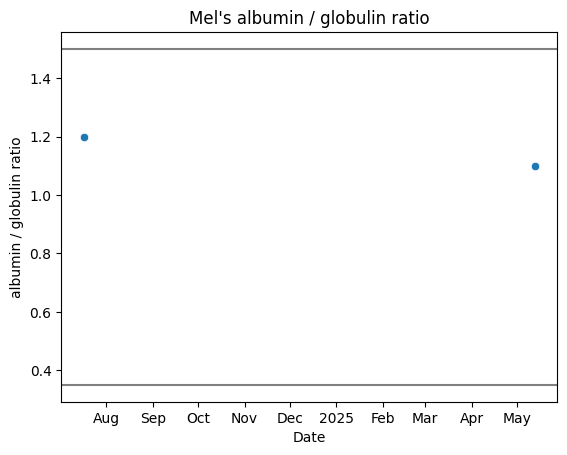

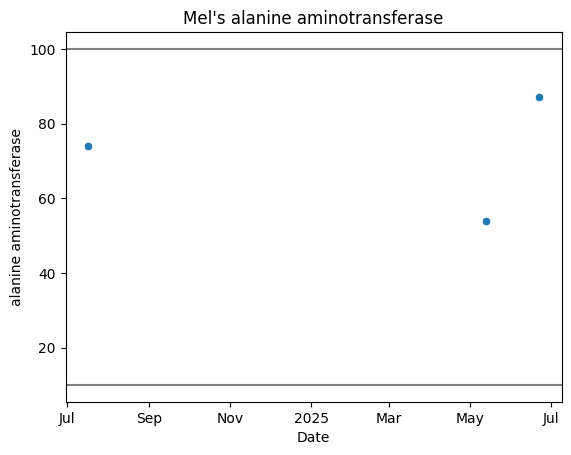

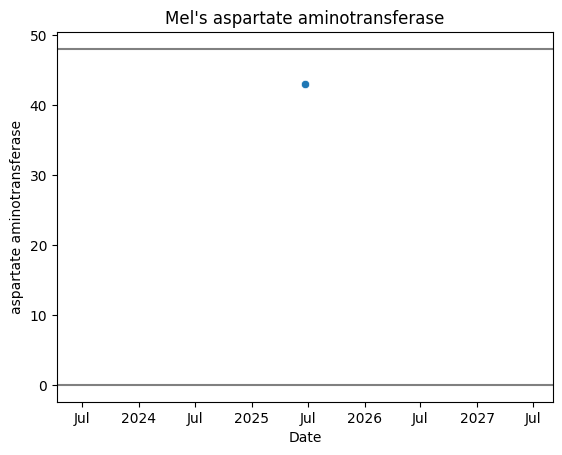

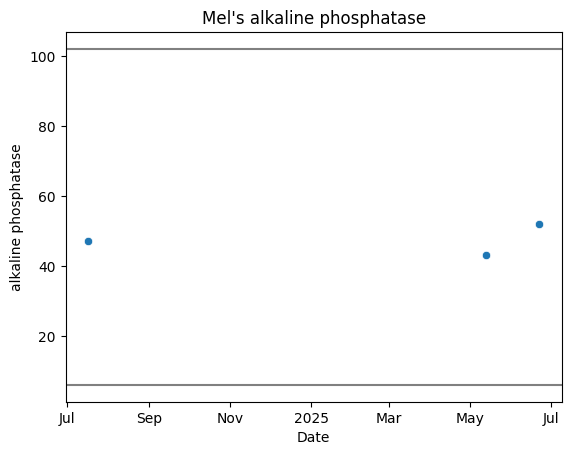

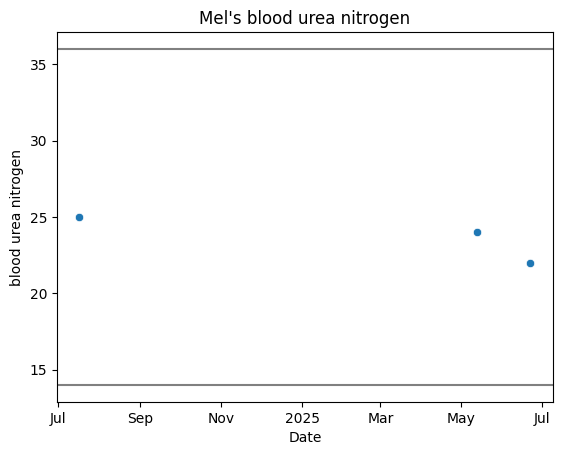

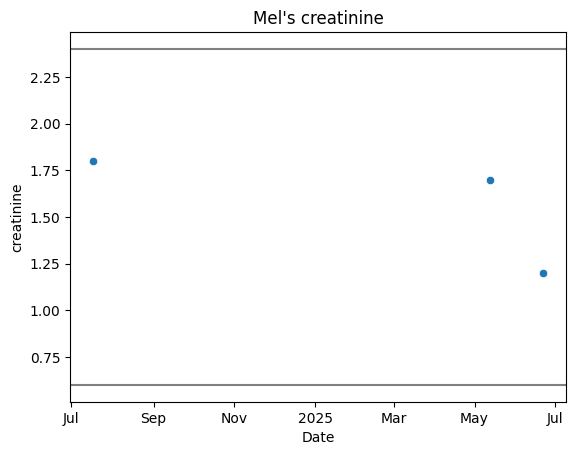

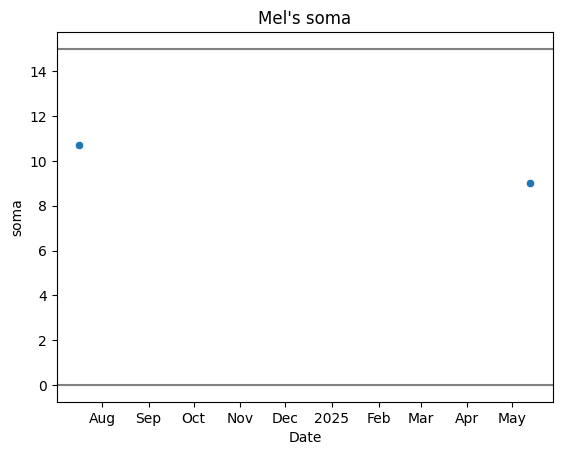

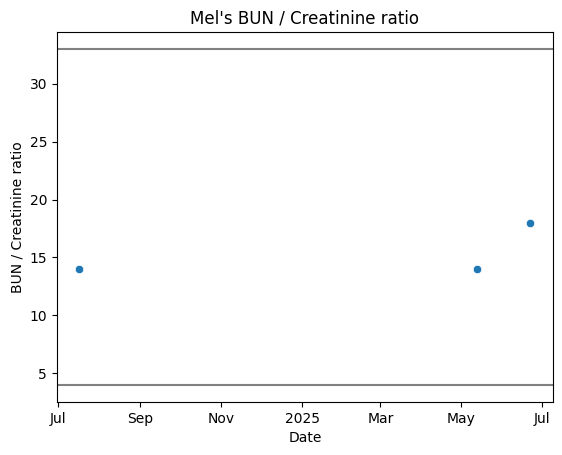

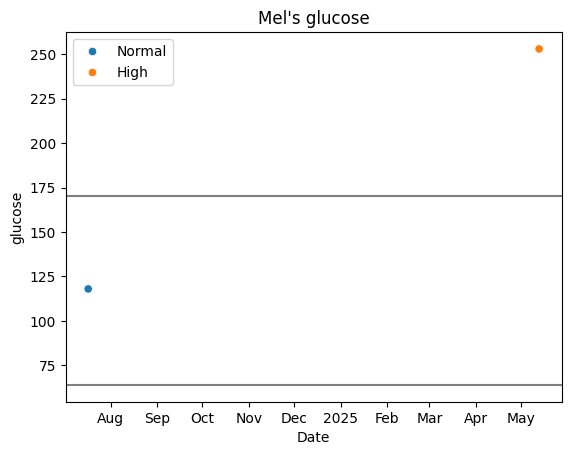

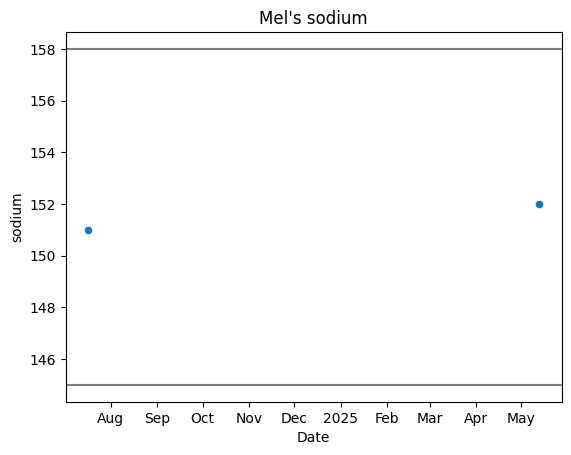

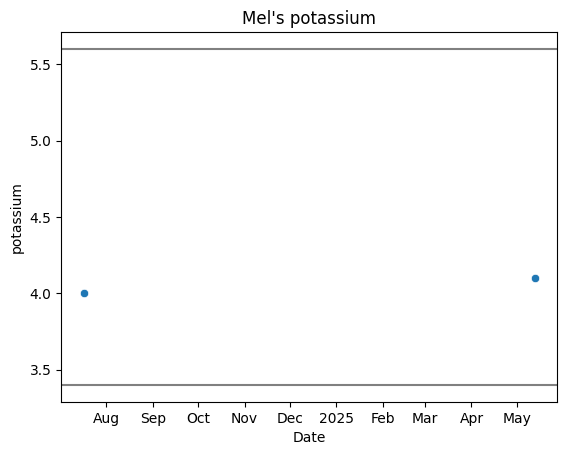

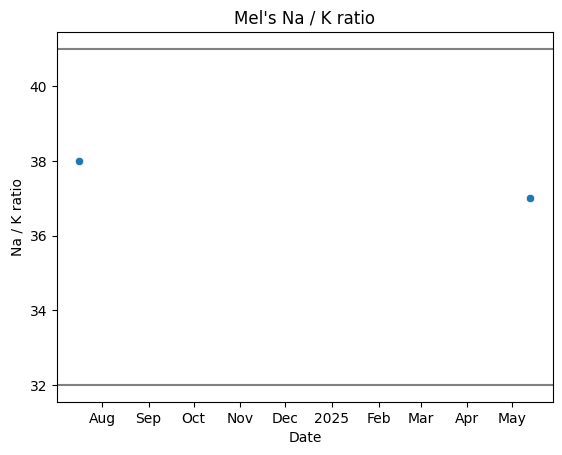

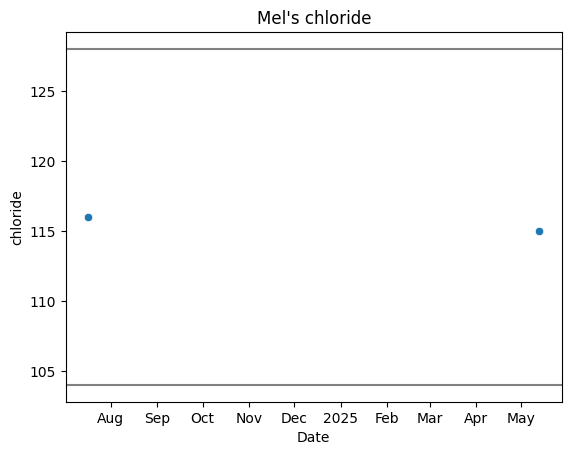

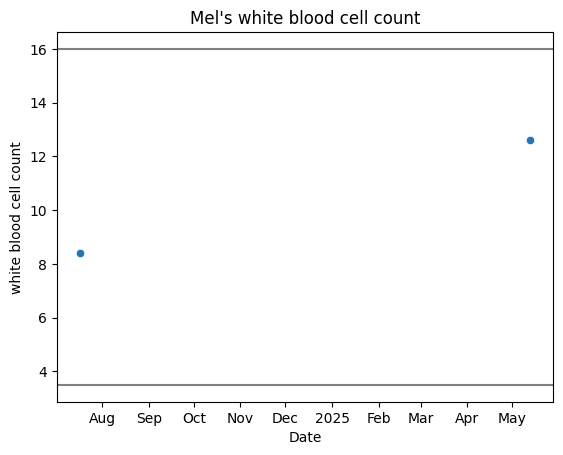

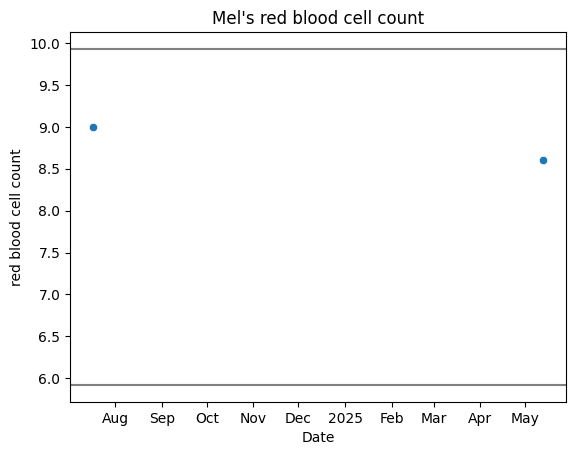

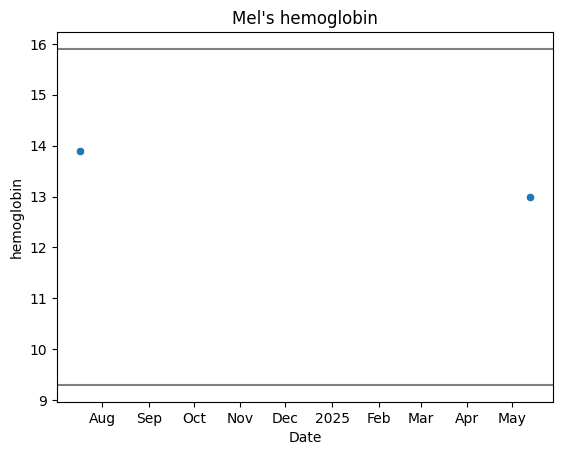

Error occurred when trying to plot hct 
Error occurred when trying to plot mcv 


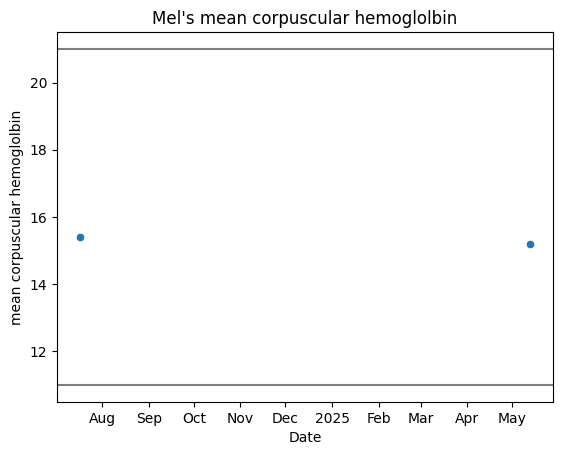

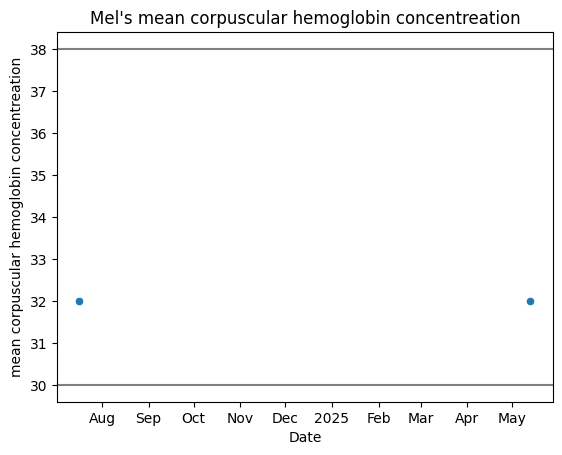

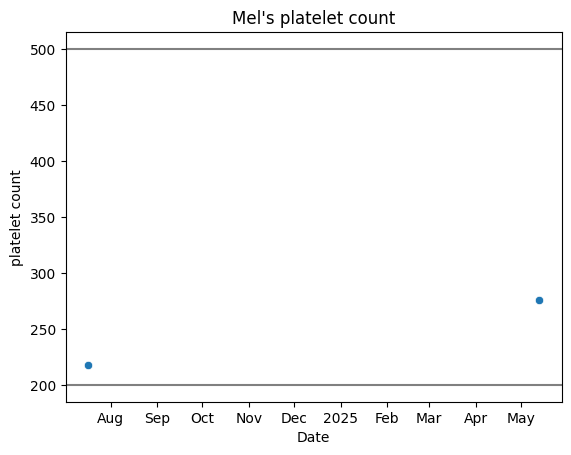

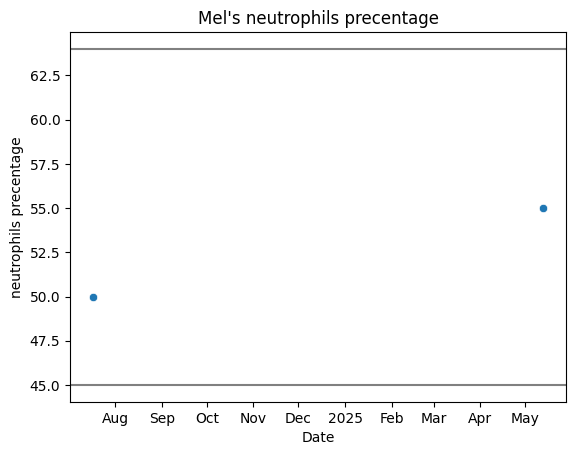

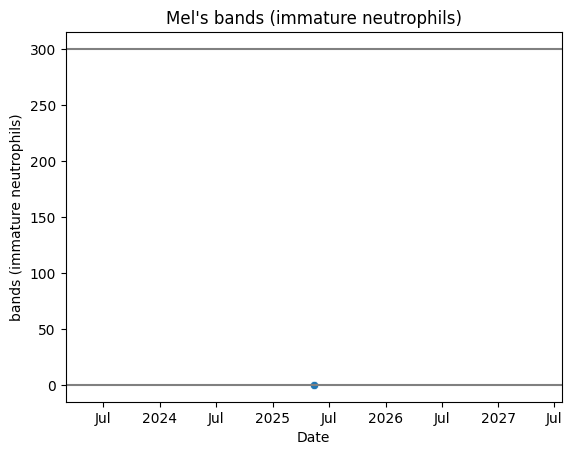

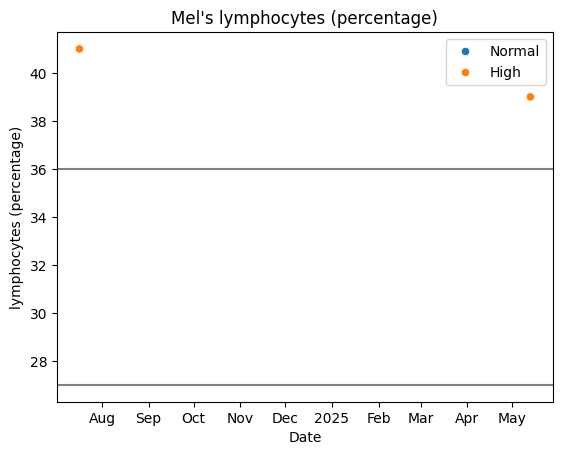

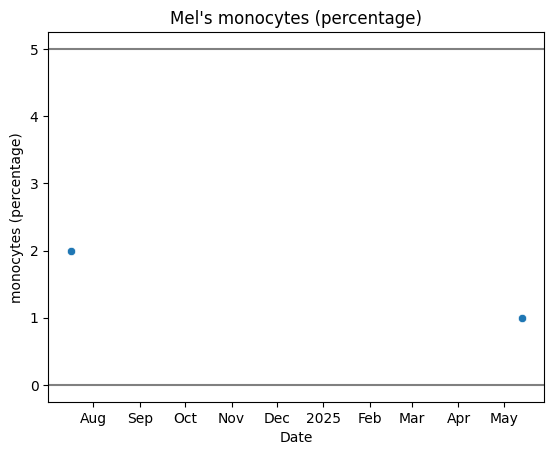

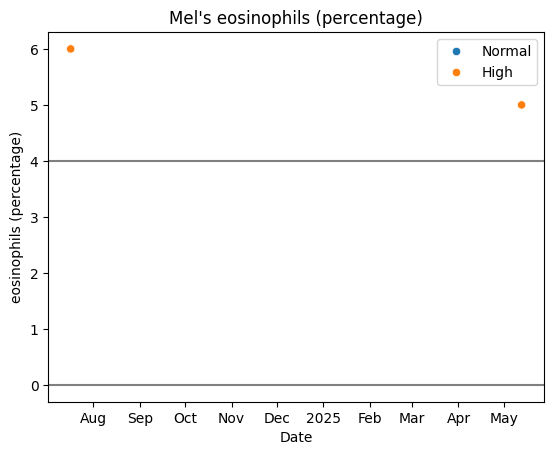

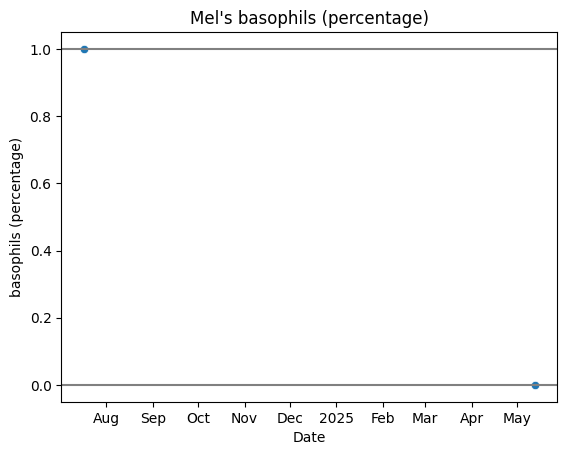

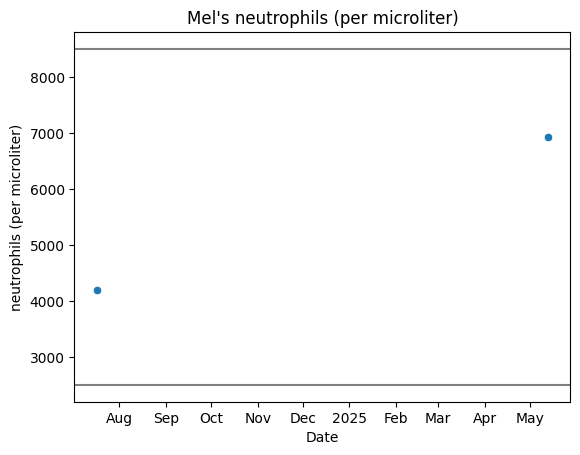

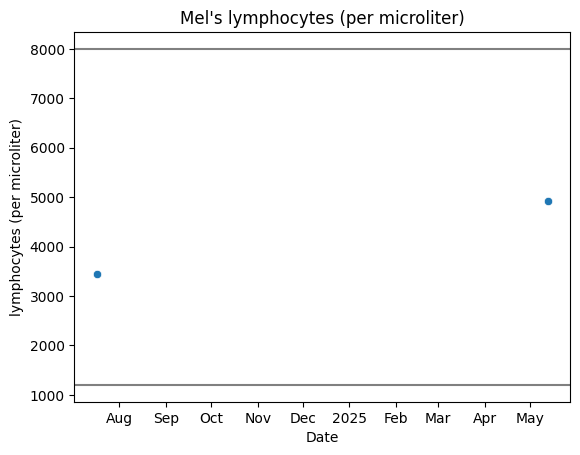

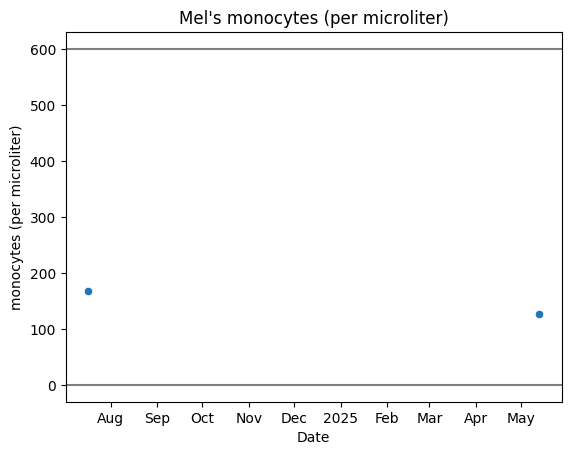

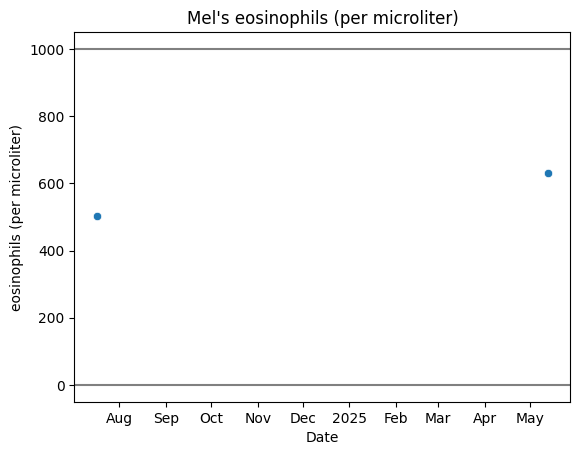

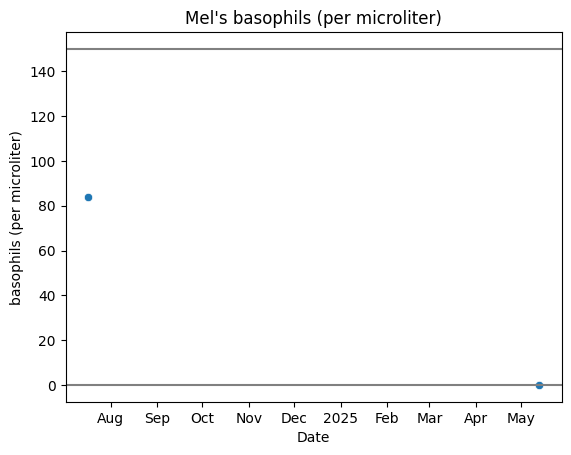

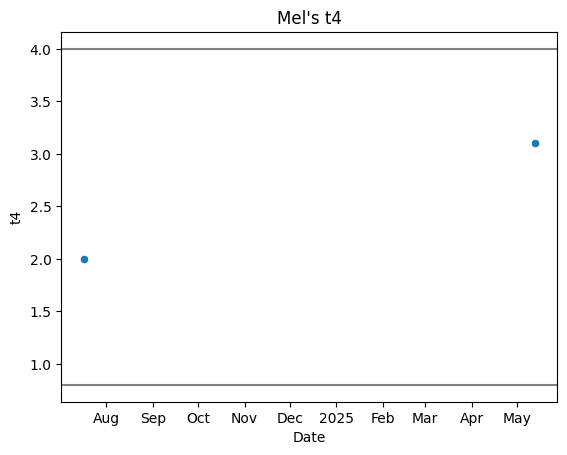

In [213]:
for col in bloods.columns[1:]:
    try:
        test_eda(col)
    except:
        print(f"Error occurred when trying to plot {col}")

No abnormal results observed for total protein
No abnormal results observed for albumin
No abnormal results observed for globulin
No abnormal results observed for albumin / globulin ratio
No abnormal results observed for alanine aminotransferase
No abnormal results observed for aspartate aminotransferase
No abnormal results observed for alkaline phosphatase
No abnormal results observed for blood urea nitrogen
No abnormal results observed for creatinine
No abnormal results observed for soma
No abnormal results observed for BUN / Creatinine ratio
High glucose observed on 2    2025-05-13
Name: date, dtype: object


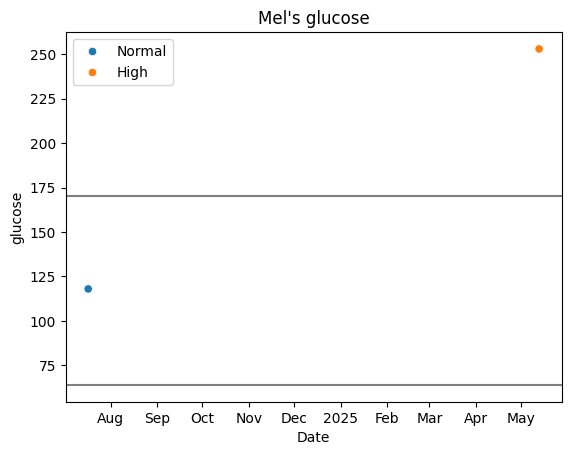

None
No abnormal results observed for sodium
No abnormal results observed for potassium
No abnormal results observed for Na / K ratio
No abnormal results observed for chloride
No abnormal results observed for white blood cell count
No abnormal results observed for red blood cell count
No abnormal results observed for hemoglobin
Error occurred while trying to analyze hct 
Error occurred while trying to analyze mcv 
No abnormal results observed for mean corpuscular hemoglolbin
No abnormal results observed for mean corpuscular hemoglobin concentreation
No abnormal results observed for platelet count
No abnormal results observed for neutrophils precentage
No abnormal results observed for bands (immature neutrophils)
High lymphocytes observed on 0    2024-07-17
Name: date, dtype: object


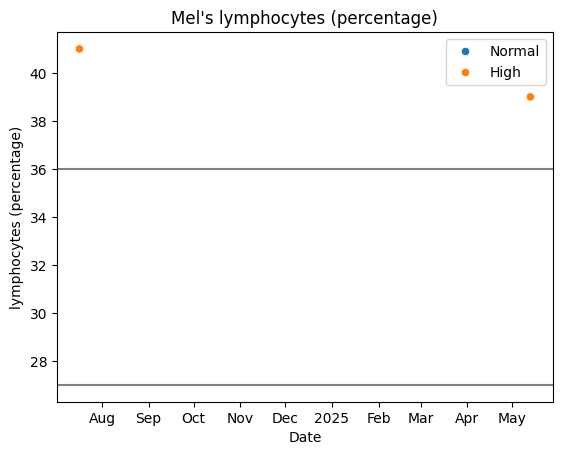

None
No abnormal results observed for monocytes (percentage)
High eosinophils observed on 0    2024-07-17
Name: date, dtype: object


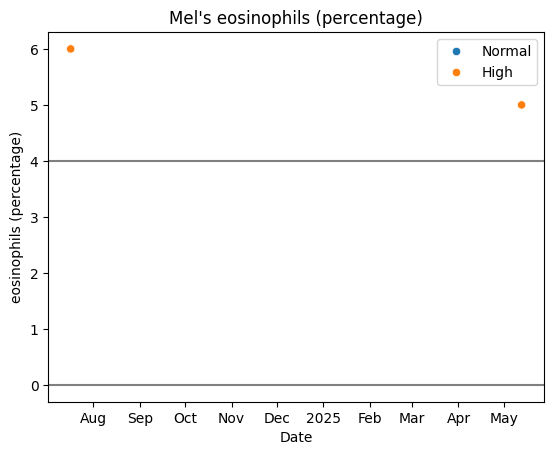

None
No abnormal results observed for basophils (percentage)
No abnormal results observed for neutrophils (per microliter)
No abnormal results observed for lymphocytes (per microliter)
No abnormal results observed for monocytes (per microliter)
No abnormal results observed for eosinophils (per microliter)
No abnormal results observed for basophils (per microliter)
No abnormal results observed for t4


In [218]:
for cat in bloods.columns[1:]:
    try:
        cat_min = blood_dict.loc[cat, 'min']
        cat_max = blood_dict.loc[cat, 'max']
        cat_name = blood_dict.loc[cat, 'full_name']
        cat_type = blood_dict.loc[cat, 'dtype']
        if cat_type in [float, 'float']:
            max_obs = bloods[cat].max()
            min_obs = bloods[cat].min()
            if max_obs > cat_max or min_obs < cat_min:
                if max_obs > cat_max:
                    print(f"High {cat} observed on {bloods[bloods[cat] == max_obs]['date']}")
                if min_obs < cat_min:
                    print(f"Low {cat} observed on {bloods[bloods[cat] == max_obs]['date']}")
                
                print(test_eda(cat))
            else:
                print(f"No abnormal results observed for {cat_name}")
        else:
            pass
    except:
        print(f"Error occurred while trying to analyze {cat}")

In [224]:
bloods[bloods['glucose'] > 170]['date']

2    2025-05-13
Name: date, dtype: object